In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib
import time
# from timing import time_it as tt
from mpl_toolkits.mplot3d import Axes3D
import math

In [2]:
def loadData():
	'''Load data logisticX.csv and logisticY.csv
		Return type: dict
		{'X': X, 'Y' : Y}
	'''
	X = np.array(pd.read_csv('q4x.dat', sep="\s+", header=None))
	Y = np.array(pd.read_csv('q4y.dat', header=None))

	return {'X' : X, 'Y': Y}

In [3]:
def normalize(V):
	'''Normalizes 1-D numpy vector
		(X - mean) / (max - min)
	'''
	return (V - np.mean(V, axis=0)) / np.std(V, axis=0)

In [4]:
def designMatrix(X):
	'''
	X:
		[x_1_0, x_1_0, ...x_i_0.. x_n_0 ]
		[x_1_1, x_1_1, ...x_i_1.. x_n_1 ]
		[       .......                 ]
		[x_1_m, x_1_m, ...x_i_m.. x_n_m ]

	return:
		[1 x_1_0, x_1_0, ...x_i_0.. x_n_0 ]
		[1 x_1_1, x_1_1, ...x_i_1.. x_n_1 ]
		[         .......                 ]
		[1 x_1_m, x_1_m, ...x_i_m.. x_n_m ]
	'''
	nrow = len(X)
	return np.append(np.ones((nrow, 1)), X, axis=1)

In [5]:
# Alaska = 0
# Canada = 1

In [6]:
# φ =1/m Σ1{y(i) = 1}
def phi(Y):
    m = Y.shape[0]
    ones = np.count_nonzero(Y == "Canada")
    return ones / m
    

In [7]:
data = loadData()
X = designMatrix(normalize(data['X']))
Y = data['Y']

In [62]:
phy = phi(Y)

In [9]:
def mu(X, Y, S):
    denominator = np.count_nonzero(Y == S)

    sum_x = 0
    for index , row in enumerate(Y):
        if row[0] == S:
            sum_x+= X[index][1]
    u1 =  sum_x / denominator
    
    sum_x = 0
    for index , row in enumerate(Y):
        if row[0] == S:
            sum_x+= X[index][2]
    u2 =  sum_x / denominator
    
    return np.array([[u1], [u2]])
    
    


In [10]:
X[0][1]

-0.38344522690247185

In [281]:
u0 = mu(X, Y, "Alaska")

In [12]:
u1 = mu(X, Y, "Canada")

In [13]:
print(u0)
print(u1)

[[-0.75529433]
 [ 0.68509431]]
[[ 0.75529433]
 [-0.68509431]]


In [29]:
def sigma(X, Y):
    m = X.shape[0]
    n = X.shape[1]
    print(m ,n)
    u0 = mu(X, Y, "Alaska")
    u1 = mu(X, Y, "Canada")
    print(u0, u1)
    sigma_Matrix = 0
    for i in range(0, m):
        x_i = (X[i][1:].T).reshape(2,1)
        if Y[i][0] == "Alaska":
            v = x_i - u0
        else:
            v = x_i - u1
        
        sigma_Matrix += np.dot(v, v.T)
    return sigma_Matrix / m

In [37]:
sig = sigma(X, Y)

100 3
[[-0.75529433]
 [ 0.68509431]] [[ 0.75529433]
 [-0.68509431]]


In [16]:
X[0][1:] - u0.T

array([[ 0.3718491, -1.340194 ]])

In [ ]:
[[-0.75529433]
 [ 0.68509431]] [[ 0.75529433]
 [-0.68509431]] [[ 0.42953048 -0.02247228]
 [-0.02247228  0.53064579]]

In [284]:
print(u0, u1, sig)

[[-0.75529433]
 [ 0.68509431]] [[ 0.75529433]
 [-0.68509431]] [[ 0.42953048 -0.02247228]
 [-0.02247228  0.53064579]]


In [17]:
# part (b)

In [18]:
def getXData(X, Y, val = 0):
    m = X.shape[1]
    new_x = np.empty((0, m))
    for index, row in enumerate(Y):
        if row[0] == val:
            new_x = np.append(new_x, X[index])
    new_x = new_x.reshape((-1,m))   
    return new_x     

In [19]:
xx0 = getXData(X, Y, val="Alaska")
x10 = xx0[:,1]
x20 = xx0[:,2]

xx1 = getXData(X, Y, val="Canada")
x11 = xx1[:,1]
x21 = xx1[:,2]

In [ ]:
plt.xlabel()

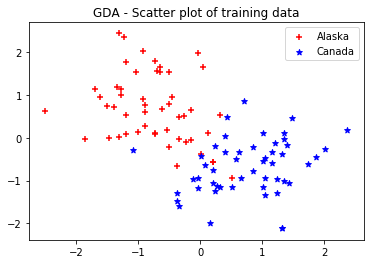

In [25]:
plt.title("GDA - Scatter plot of training data")
plt.scatter(x10, x20,color="r", label="Alaska", marker="+")
plt.scatter(x11, x21,color="b", label="Canada", marker="*")
plt.legend(loc="upper right")

In [26]:
#part(3)

In [63]:
def calcCoeff(u0, u1, sig, phy):
    #(u0-u1).T * inv(sigma)
    sig_inv = np.linalg.inv(sig)
    c1 =  np.dot( ((u0-u1).T), sig_inv) 
    
    a_temp1 = np.dot(u1.T, sig_inv)
    a_temp2 = np.dot(a_temp1, u1)
    
    b_temp1 = np.dot(u0.T, sig_inv)
    b_temp2 = np.dot(b_temp1, u0)
    
    b_temp3 = b_temp2 - math.log(phy/(1 - phy))
    
    c2 = 1/2 *(a_temp2 - b_temp2)
    
    return (c1, c2)
    

In [65]:
calcCoeff(u0, u1, sig, phy)    

(array([[-3.38925452,  2.43858399]]), array([[-1.11022302e-15]]))

In [303]:
def plotDecisionBoundry(u0, u1, sig, phy, X, Y):
    (A, c) = calcCoeff(u0, u1, sig, phy)
    a1 = A[0][0]
    a2 = A[0][1]
    x1 = X[:, 1].reshape(-1, 1)
    x2 = -(c + a1*x1) / a2
    print(a1)
    print(A[0:,])
    
    xx0 = getXData(X, Y, val="Alaska")
    x10 = xx0[:,1]
    x20 = xx0[:,2]
    
    xx1 = getXData(X, Y, val="Canada")
    x11 = xx1[:,1]
    x21 = xx1[:,2]
    
    plt.plot(x1, x2, label="Boundry")
    plt.scatter(x10, x20,color="r", label="Alaska", marker="+")
    plt.scatter(x11, x21,color="b", label="Canada", marker="*")
    plt.title("Decision Boundry")
    plt.legend(loc="upper right")
#     plt.xlabel("x1")
#     plt.ylabel("x2")
    
    
    

-3.3892545212594527
[[-3.38925452  2.43858399]]


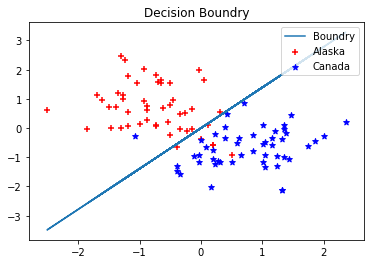

In [305]:
plotDecisionBoundry(u0, u1, sig, phy, X, Y)

In [79]:
# part(d)

In [117]:
def sigmaGeneral(X, Y, value=0):
    m = Y.shape[0]
    y_count = 0
    u = 0
#     y_non_zero = np.count_nonzero(Y[:,0])
#     y_zero = m - y_non_zero
#     print(y_non_zero)
#     print(y_zero)
    n = X.shape[1]
#     print(m ,n)
    u0 = mu(X, Y, "Alaska")
    u1 = mu(X, Y, "Canada")
    S = ""
    if value == 0:
        S = "Alaska"
        u = u0
    else:
        S = "Canada"
        u = u1

  
#     print(u0, u1)
    sigma_Matrix = 0
    for i in range(0, m):
        if Y[i][0] == S:
            y_count += 1
            x_i = (X[i][1:].T).reshape(2,1)
            v = x_i - u
            sigma_Matrix += np.dot(v, v.T)
            
#         if Y[i][0] == "Alaska":
#             v = x_i - u0
#         else:
#             v = x_i - u1
        
    print(y_count)
    return sigma_Matrix / y_count

In [118]:
sigma0 = sigmaGeneral(X, Y, 0)
sigma1 = sigmaGeneral(X, Y, 1)

50
50


In [119]:
sigma0

array([[ 0.38158978, -0.15486516],
       [-0.15486516,  0.64773717]])

In [120]:
sigma1

array([[0.47747117, 0.1099206 ],
       [0.1099206 , 0.41355441]])

In [266]:
def calcCoeffQuad(sigma0, sigma1, mu0, mu1, phy):
    sig0_inv = np.linalg.inv(sigma0)
    sig1_inv = np.linalg.inv(sigma1)
    
    Q = sig0_inv - sig1_inv
    
    u_0_s_0 = (mu0.T).dot(sig0_inv)
    u_1_s_1 = (mu1.T).dot(sig1_inv)
    
    d_sig0 = np.linalg.det(sigma0)
    d_sig1 = np.linalg.det(sigma1)
    
    L = u_0_s_0 - u_1_s_1
    
    C = (-u_1_s_1.dot(mu1) + u_0_s_0.dot(mu0))/2 + math.log(phy/(1 - phy)) - (1/2) * (math.log(d_sig1) - math.log(d_sig0))
    
    return (Q/2, L/2, C)


In [267]:
calcCoeffQuad(sigma0, sigma1, u0, u1, phy)

(array([[ 0.3356739 ,  0.64341817],
        [ 0.64341817, -0.43296599]]),
 array([[-1.9039266 ,  1.42983653]]),
 array([[-0.58478699]]))

In [268]:
phy

0.5

In [278]:
def plotQuadDecisionBoundry(u0, u1, sigma0, sigma1, phy, X, Y):
    q_coeff = calcCoeffQuad(sigma0, sigma1, u0, u1, phy)
    
    Q = q_coeff[0]
    L = q_coeff[1]
    Const_term = q_coeff[2][0][0]
    
    A = Q[0][0]
    B = Q[1][1]
    C = 2 * Q[0][1]
    D = -2 * L[0][0]
    E = -2 * L[0][1]
    print(Const_term, A, B, C, D, E)
    
    
    x1 = np.linspace(-2, 2, 400)
#     print(x1)
    alpha = B
    beta = C * x1 + E
    gama = A*(x1**2) + D*x1 + Const_term
    
#     print(alpha, beta, gama)
    
    
    
    x2 = solveSqrt(alpha, beta, gama)
#     x2 = [solveSqrt(B, C * i + E, A*(i**2) + D*i + Const_term) for i in x1]
    
    plt.plot(x1, x2)


In [279]:
def solveSqrt(alpha, beta, gama):
#     print(alpha, beta, gama)
    return (-beta - np.sqrt(beta**2 - 4*alpha*gama)) / (2 * alpha)

-0.5847869867727319 0.3356738996816149 -0.4329659903108941 1.2868363366568851 3.8078531935404865 -2.8596730626868707


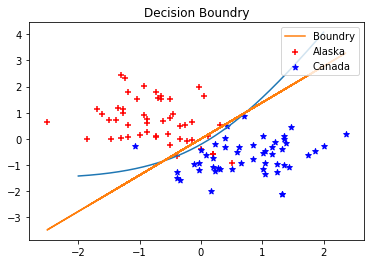

In [286]:

plotQuadDecisionBoundry(u0, u1, sigma0, sigma1, phy, X, Y)
plotDecisionBoundry(u0, u1, sig, phy, X, Y)